In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
import pandas as pd

In [10]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

In [11]:
from load_ensembles import *

In [12]:
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

# Coupled PPE

In [14]:
dir_cpl='/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/cpl/proc/'
ds_ha2x1h=xr.open_dataset(dir_cpl+'COUP0000_PI_SOM.cpl.ha2x1h.0064-04.nc')
ds_ha2x3h=xr.open_dataset(dir_cpl+'COUP0000_PI_SOM.cpl.ha2x3h.0114-09.nc')
ha2x1d=xr.open_dataset(dir_cpl+'COUP0000_PI_SOM.cpl.ha2x1d.0137-12.nc')
ds_ha2x1hi=xr.open_dataset(dir_cpl+'COUP0000_PI_SOM.cpl.ha2x1hi.0064-04.nc')

In [39]:
ds=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/hist/'+
                   'COUP0000_PI_SOM.clm2.h3.0114-01-02-00000.nc')

In [77]:
ds_atm=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/atm/hist/'+
                       'COUP0000_PI_SOM.cam.h2.0114-01-02-00000.nc')

In [32]:
Cp=1004.64   #specific heat of air at constant pressure (J kg^-1 K^-1)
Lv=2.4665e6 #latent heat of vaporization (2.4665 *106  Jkg) or sublimation

In [89]:
LWdn=ds_ha2x3h.a2x3h_Faxa_lwdn
SWdn=ds_ha2x3h.a2x3h_Faxa_swndr + ds_ha2x3h.a2x3h_Faxa_swndf + ds_ha2x3h.a2x3h_Faxa_swvdr +ds_ha2x3h.a2x3h_Faxa_swvdf

In [117]:
albedo=(ds.FSR/ds.FSDS)
albedo_mean=(albedo.sel(time=slice('0114-09-02','0114-10-01'))).mean(dim='time')
SWup=albedo_mean.values*SWdn

ValueError: x and y can be no greater than 2-D, but have shapes (0,) and (0, 96, 144)

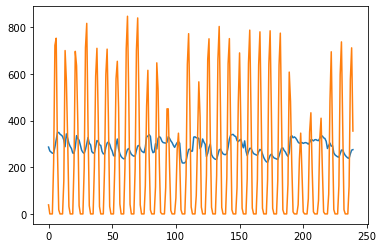

In [109]:
plt.plot(LWdn[:,70,100])
plt.plot(SWdn[:,70,100])
plt.plot(SWup[:,70,100])

In [ ]:
average(SH)=rho*Cp/ra*average(Ts-Ta)

#1 equation
# 3 unknowns: Ts, ra, SH

LWdn+SWdn-LWup(Ts)-SWup=SH+LH+G
# 1 equation
# 4 unknowns: SH, LH, G, Ts
# 1 new unknown: G

LH=rho*Lv/(ra + rs)*average([qs(Ts)-qa])

# 1 equation
# 4 unknowns: Ts, ra, LH, rs
# 2 additional unknowns

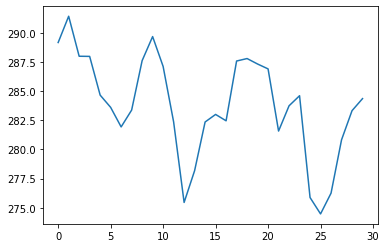

In [61]:
3 equations
6 unknowns: Ts, SH, LH, ra, rs, G

In [120]:
ds

<xarray.Dataset>
Dimensions:         (hist_interval: 2, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 144, nvegwcs: 4, time: 365)
Coordinates:
  * levgrnd         (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levsoi          (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.06 5.95 6.94 8.03
  * levlak          (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp         (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time            (time) object 0114-01-02 00:00:00 ... 0115-01-01 00:00:00
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat             (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
Dimensions without coordinates: hist_interval, nvegwcs
Data variables:
    mcdate          (time) int32 ...
    mcsec           (time) int32 ...
    mdcur           (time) int32 ...
    mscur           (time) int32 ...
    nstep           (time) int32 ...
    time_bounds     (time, hist_inte

In [43]:
Ta=ds_ha2x3h.a2x3h_Sa_ptem#.a2x3h_ny
Tbot=ds_ha2x3h.a2x3h_Sa_tbot#.a2x3h_ny
rho=ds_ha2x3h.a2x3h_Sa_dens
qa=ds_ha2x3h.a2x3h_Sa_shum

In [44]:
Tbot

<xarray.DataArray 'a2x3h_Sa_tbot' (time: 240, a2x3h_ny: 96, a2x3h_nx: 144)>
[3317760 values with dtype=float32]
Coordinates:
  * time     (time) object 0114-09-01 01:30:00 ... 0114-09-30 22:30:00
Dimensions without coordinates: a2x3h_ny, a2x3h_nx
Attributes:
    units:           K
    long_name:       Temperature at the lowest model level
    standard_name:   air_temperature
    internal_dname:  a2x3h
    cell_methods:    time: mean

In [ ]:
SH=Cpra(Ts-Ta)

In [23]:
ds_ha2x3h.a2x3h_Sa_ptem

<xarray.DataArray 'a2x3h_Sa_ptem' (time: 240, a2x3h_ny: 96, a2x3h_nx: 144)>
array([[[213.16261, 213.16544, ..., 213.16173, 213.16199],
        [211.09889, 210.9973 , ..., 211.3467 , 211.21628],
        ...,
        [271.6395 , 271.66302, ..., 271.59473, 271.61734],
        [270.67773, 270.67737, ..., 270.6783 , 270.67816]],

       [[212.45213, 212.45499, ..., 212.45125, 212.4515 ],
        [210.88133, 210.7979 , ..., 211.08453, 210.97755],
        ...,
        [271.8124 , 271.83194, ..., 271.77393, 271.79248],
        [271.1202 , 271.1199 , ..., 271.12073, 271.1205 ]],

       ...,

       [[222.338  , 222.34119, ..., 222.33702, 222.33731],
        [218.71841, 218.61961, ..., 218.98479, 218.84213],
        ...,
        [260.84027, 260.81918, ..., 260.92358, 260.8738 ],
        [265.31888, 265.3414 , ..., 265.29858, 265.30405]],

       [[222.05893, 222.06259, ..., 222.05782, 222.05814],
        [218.3781 , 218.2626 , ..., 218.69106, 218.5174 ],
        ...,
        [261.05887, 260.948

# Offline PPE

In [5]:
from utils import *

In [173]:
key_CLM5PPE='OAAT0013'

In [215]:
ds_forcing=xr.open_dataset('/glade/campaign/asp/djk2120/PPEn11/forcing/atm_forcing.datm7.GSWP3.0.5d.v1.c210222_400/TPHWL/'+
                             'clmforc.GSWP3.c2011.0.5x0.5.TPQWL.2005-07.nc')

In [214]:
ds_h7=xr.open_mfdataset('/glade/campaign/asp/djk2120/PPEn11/CTL2010/hist/'+
                        'PPEn11_CTL2010_OAAT0363.clm2.h7.2005-01-01-00000.nc')

In [216]:
ds_h7=ds_h7.sel(time=slice('2005-07-01','2005-07-31'))
ds_forcing=ds_forcing.sel(time=slice('2005-07-01','2005-07-31'))#.time

In [222]:
Tdelta1=ds_h7.TSKIN.values[:,:]-ds_forcing.TBOT[:,0,:].values

In [225]:
np.shape(ds_h7.TSKIN)

(248, 400)

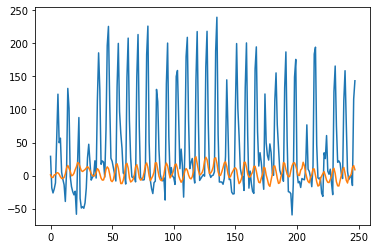

In [266]:
i=240
plt.plot(ds_h7.FSH[:,i])
plt.plot(Tdelta1[:,i])

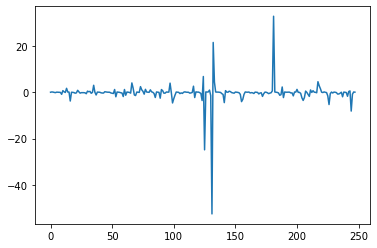

In [267]:
plt.plot((Tdelta1[:,i]/ds_h7.FSH[:,i]))

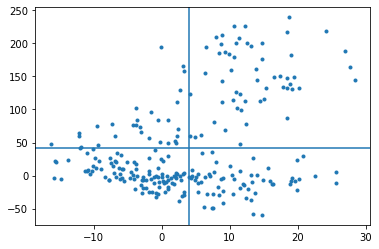

In [268]:
plt.plot(Tdelta1[:,i],ds_h7.FSH[:,i],'.')
plt.axhline(y=ds_h7.FSH[:,i].mean(dim='time'))
plt.axvline(x=ds_h7.TSKIN.mean(dim='time')[i].values-ds_forcing.TBOT.mean(dim='time')[0,i].values)

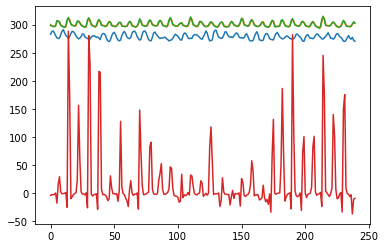

In [184]:
plt.plot(ds_forcing.TBOT[:,0,100])
plt.plot(ds_h7.TSA.sel(time=slice('2005-09-01','2005-09-30'))[:,100])
plt.plot(ds_h7.TSKIN.sel(time=slice('2005-09-01','2005-09-30'))[:,100])
plt.plot(ds_h7.FSH.sel(time=slice('2005-09-01','2005-09-30'))[:,100])

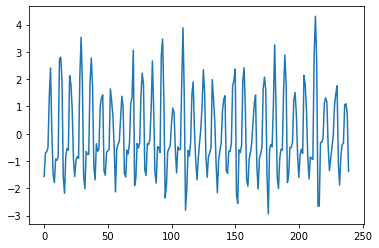

In [179]:
plt.plot(Tdelta1.sel(time=slice('2005-09-01','2005-09-30'))[:,100])

In [168]:
FSH=ds_h7.FSH.sel(time=slice('2005-09-01','2005-09-30'))[:,100]
Tskin=ds_h7.TSKIN.sel(time=slice('2005-09-01','2005-09-30'))[:,100].values
#Tdelta=-ds_forcing.TBOT[:,0,100].values

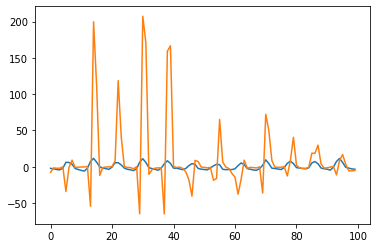

In [171]:
plt.plot(Tskin[0:100]-np.nanmean(Tskin))
plt.plot(FSH[0:100])

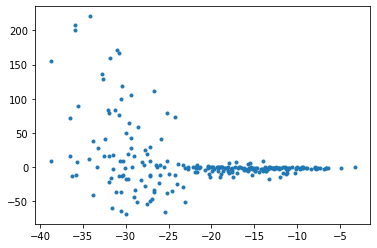

In [162]:

plt.plot(Tdelta,
         FSH,'.')

In [153]:
ds_h7.TSKIN.sel(time=slice('2005-09-01','2005-09-30')).time

<xarray.DataArray 'time' (time: 240)>
array([cftime.DatetimeNoLeap(2005, 9, 1, 0, 0, 0, 0, 1, 244),
       cftime.DatetimeNoLeap(2005, 9, 1, 3, 0, 0, 0, 1, 244),
       cftime.DatetimeNoLeap(2005, 9, 1, 6, 0, 0, 0, 1, 244), ...,
       cftime.DatetimeNoLeap(2005, 9, 30, 15, 0, 0, 0, 2, 273),
       cftime.DatetimeNoLeap(2005, 9, 30, 18, 0, 0, 0, 2, 273),
       cftime.DatetimeNoLeap(2005, 9, 30, 21, 0, 0, 0, 2, 273)], dtype=object)
Coordinates:
  * time     (time) object 2005-09-01 00:00:00 ... 2005-09-30 21:00:00
Attributes:
    long_name:  time
    bounds:     time_bounds

In [150]:
ds_forcing.TBOT[:,0,100].time#)

<xarray.DataArray 'time' (time: 240)>
array([cftime.DatetimeNoLeap(2005, 9, 1, 1, 30, 0, 0, 1, 244),
       cftime.DatetimeNoLeap(2005, 9, 1, 4, 30, 0, 0, 1, 244),
       cftime.DatetimeNoLeap(2005, 9, 1, 7, 30, 0, 0, 1, 244), ...,
       cftime.DatetimeNoLeap(2005, 9, 30, 16, 30, 0, 0, 2, 273),
       cftime.DatetimeNoLeap(2005, 9, 30, 19, 30, 0, 0, 2, 273),
       cftime.DatetimeNoLeap(2005, 9, 30, 22, 30, 0, 0, 2, 273)], dtype=object)
Coordinates:
  * time     (time) object 2005-09-01 01:30:00 ... 2005-09-30 22:30:00
Attributes:
    long_name:  observation time

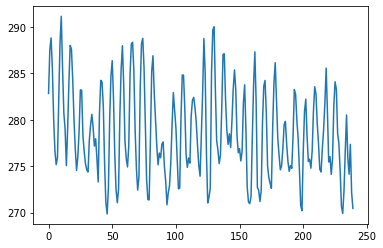

In [148]:
plt.plot(ds_forcing.TBOT[:,0,100])

In [140]:
ds_h5.TSKIN.sel(time=slice('2005-09-01','2005-09-30'))

<xarray.DataArray 'TSKIN' (time: 30, gridcell: 400)>
dask.array<shape=(30, 400), dtype=float32, chunksize=(30, 400)>
Coordinates:
  * time     (time) object 2005-09-01 00:00:00 ... 2005-09-30 00:00:00
Dimensions without coordinates: gridcell
Attributes:
    long_name:     skin temperature
    units:         K
    cell_methods:  time: mean

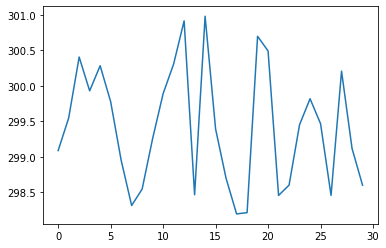

In [138]:
plt.plot(ds_h5.TSKIN.sel(time=slice('2005-09-01','2005-09-30'))[:,100])#.rolling(time=3).mean())

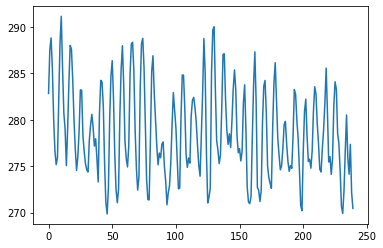

In [127]:
plt.plot(ds_forcing.TBOT[:,0,100].)

In [ ]:
NEEDED: LWdown, LWup, FSDS, FSA, 

FSH, EFLX_LH_TOT, TSKIN, Ta, rho, 
ra, rs

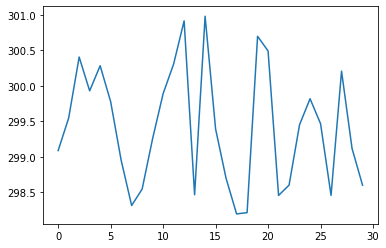

In [126]:
plt.plot(ds_h5.TSKIN.sel(time=slice('2005-09-01','2005-09-30'))[:,100])